In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np

from scipy.interpolate import RectBivariateSpline

%matplotlib inline

In [2]:
# data from
# https://data.dtu.dk/articles/dataset/AI4Arctic_ASIP_Sea_Ice_Dataset_-_version_2/13011134
ifile = '/Data/sat/downloads/sentinel1/ASIPv2/20190509T081306_S1A_AMSR2_Icechart-Greenland-CentralEast.nc'
ds = Dataset(ifile)

# reduce hi res data by this step
stp = 10

In [3]:
for key in ds.variables.keys():
    print(key, ds[key].shape)

sar_incidenceangles (10499,)
sar_primary (9995, 10499)
sar_secondary (9995, 10499)
polygon_codes (29,)
polygon_icechart (9995, 10499)
sar_grid_line (441,)
sar_grid_sample (441,)
sar_grid_latitude (441,)
sar_grid_longitude (441,)
sar_grid_incidenceangle (441,)
sar_grid_height (441,)
distance_map (9995, 10499)
nersc_sar_primary (9995, 10499)
nersc_sar_secondary (9995, 10499)
btemp_6.9h (200, 211)
btemp_6.9v (200, 211)
btemp_7.3h (200, 211)
btemp_7.3v (200, 211)
btemp_10.7h (200, 211)
btemp_10.7v (200, 211)
btemp_18.7h (200, 211)
btemp_18.7v (200, 211)
btemp_23.8h (200, 211)
btemp_23.8v (200, 211)
btemp_36.5h (200, 211)
btemp_36.5v (200, 211)
btemp_89.0ah (200, 211)
btemp_89.0bh (200, 211)
btemp_89.0av (200, 211)
btemp_89.0bv (200, 211)
btemp_89.0h (200, 211)
btemp_89.0v (200, 211)
lon (200, 211)
lat (200, 211)
sample (211,)
line (200,)
delays (200, 211)
count (4,)


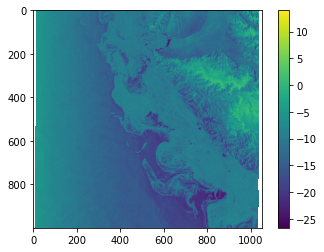

In [4]:
sar1 = ds['nersc_sar_primary'][::stp, ::stp].filled(np.nan)
plt.imshow(sar1)
plt.colorbar()

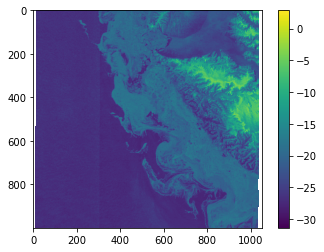

In [5]:
sar2 = ds['nersc_sar_secondary'][::stp, ::stp].filled(np.nan)
plt.imshow(sar2)
plt.colorbar()

(200, 211)


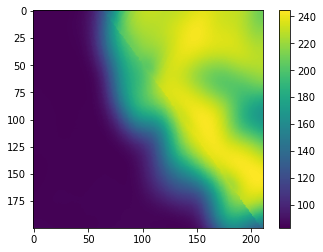

In [6]:
btemp_6_9h = ds['btemp_6.9h'][:].filled(np.nan)
print(btemp_6_9h.shape)
plt.imshow(btemp_6_9h)
plt.colorbar()

(200, 211)


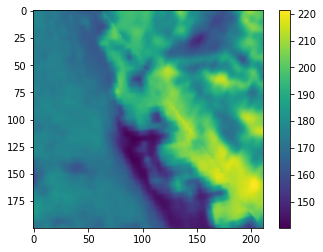

In [7]:
btemp_36 = ds['btemp_36.5h'][:].filled(np.nan)
print(btemp_36.shape)
plt.imshow(btemp_36)
plt.colorbar()

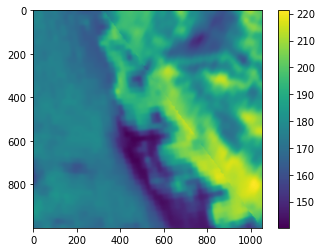

In [8]:
# interpolation to full size
# not really necessary, just to explain the concept
bt_sample = ds['sample'][:] # 25 75 125
bt_line = ds['line'][:] # 25 75 125

bt_sample_fs = np.arange(0,1000)
bt_line_fs = np.arange(0,1000)


spline = RectBivariateSpline(bt_line,  bt_sample, btemp_36)
btemp_36_fs = spline(np.arange(0, sar1.shape[0]*stp, stp), np.arange(0, sar1.shape[1]*stp, stp))
plt.imshow(btemp_36_fs)
plt.colorbar()

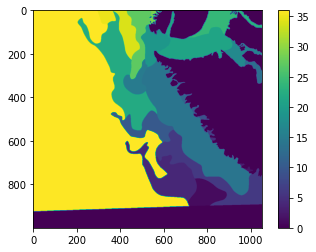

['id;CT;CA;SA;FA;CB;SB;FB;CC;SC;FC;CN;CD;CF;POLY_TYPE'
 '1;20;10;93;4;10;91;4;-9;-9;-9;95;-9;19;I'
 '2;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '3;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '4;50;20;95;4;20;93;4;10;91;3;98;-9;19;I'
 '5;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '6;91;20;95;5;50;93;5;30;91;4;98;-9;-9;I'
 '7;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '8;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '9;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '10;50;20;95;4;20;93;4;10;91;3;98;-9;19;I'
 '11;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '12;92;60;93;8;40;91;-9;-9;-9;-9;95;-9;-9;I'
 '13;92;20;98;8;80;91;-9;-9;-9;-9;-9;-9;-9;I'
 '14;91;50;95;6;40;93;5;10;91;4;98;-9;-9;I'
 '15;50;20;95;5;20;93;4;10;91;3;98;-9;19;I'
 '16;92;20;98;8;70;93;-9;10;91;-9;-9;-9;-9;I'
 '17;92;10;98;8;70;93;-9;20;91;-9;-9;-9;-9;I'
 '18;92;80;87;8;20;83;-9;-9;-9;-9;95;-9;-9;I'
 '19;90;40;93;6;30;91;6;20;87;4;95;-9;-9;I'
 '21;92;70;93;8;30;91;-9;-9;-9;-9;98;-9;-9;I'
 '22;90;40;95;5;30;91;4;20;87;3;98;-9;-9;I'
 '2

In [11]:
ic = ds['polygon_icechart'][::stp, ::stp].filled(0)
plt.imshow(ic)
plt.colorbar()
plt.show()


p_codes = ds['polygon_codes'][:]
print(p_codes)

In [12]:
# encode concentration
# retrieve ide of each polygon and total concentration
p_ids, p_cts = [[int(pc.split(';')[i]) for pc in p_codes[1:]] for i in [0,1]]

# put total concentration into matrix
ic_ct = np.zeros_like(ic)
for pid, pct in zip(p_ids, p_cts):
    ic_ct[ic == pid] = pct

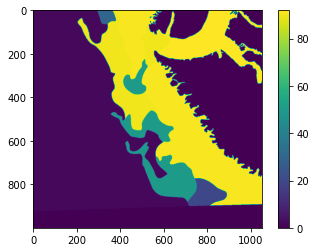

In [13]:
plt.imshow(ic_ct)
plt.colorbar()

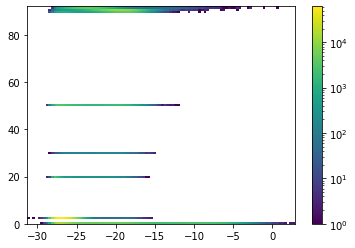

In [14]:
gpi = np.isfinite(ic_ct * sar2)
plt.hist2d(sar2[gpi], ic_ct[gpi], 100, cmin=1, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.show()

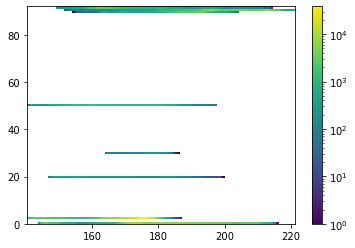

In [15]:
gpi = np.isfinite(ic_ct * btemp_36_fs)
plt.hist2d(btemp_36_fs[gpi], ic_ct[gpi], 100, cmin=1, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.show()

20180327T104059_S1B_AMSR2_Icechart-Greenland-CentralWest.nc


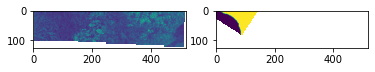

20180404T205505_S1B_AMSR2_Icechart-Greenland-CentralWest.nc


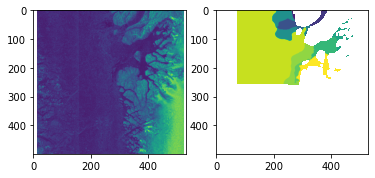

20180410T084537_S1B_AMSR2_Icechart-Greenland-SouthEast.nc


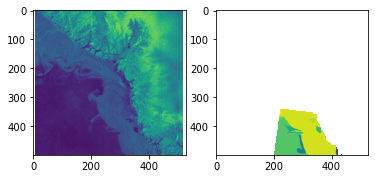

20180413T202620_S1B_AMSR2_Icechart-Greenland-CapeFarewell.nc


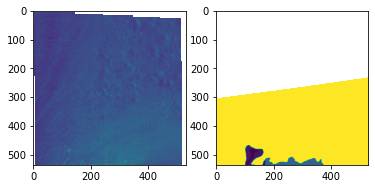

20190509T081306_S1A_AMSR2_Icechart-Greenland-CentralEast.nc


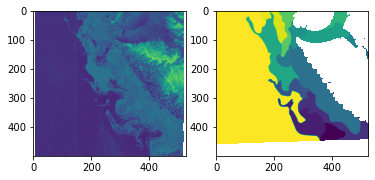

20190517T102423_S1A_AMSR2_Icechart-Greenland-CentralWest.nc


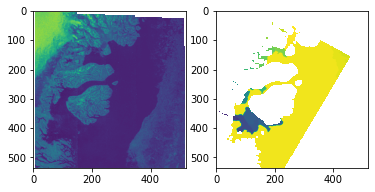

20190519T194808_S1A_AMSR2_Icechart-Greenland-SouthEast.nc


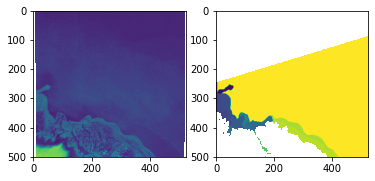

20190524T101631_S1A_AMSR2_Icechart-Greenland-CentralWest.nc


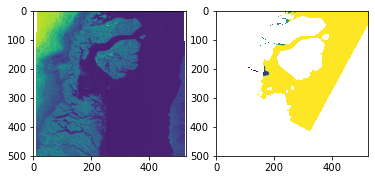

20190525T203543_S1A_AMSR2_Icechart-Greenland-CapeFarewell.nc


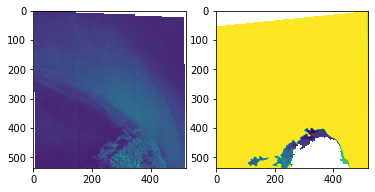

20190525T203647_S1A_AMSR2_Icechart-Greenland-CapeFarewell.nc


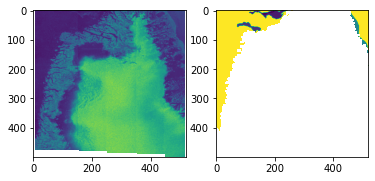

In [ ]:
idir = '/Data/sat/downloads/sentinel1/AI4Arctic_ASIP_Sea_Ice_Dataset_v2/'
ifiles = sorted(glob.glob(idir + '*.nc'))
stp = 20

for ifile in ifiles:
    ds = Dataset(ifile)
    sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
    ic = ds['polygon_icechart'][::stp, ::stp]

    print(os.path.basename(ifile))
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(sar2)
    ax[1].imshow(ic)
    plt.show()

In [ ]:
SoD =  {       1:(  0, 100, 255),    # Ice free
              81:(240, 210, 250),    # New ice
              82:(255, 138, 255),    # Nilas, Ice Rind
              83:(170,  40, 240),    # Young ice
              84:(135,  60, 215),    # Grey ice
              85:(220,  80, 235),    # Grey-white ice
              86:(255, 255,   0),    # First-year ice (FY)
              87:(155, 210,   0),    # FY thin ice (white ice)
              88:(215, 250, 130),    # FY thin ice (white ice) first stage
              89:(175, 250,   0),    # FY thin ice (white ice) second stage
              91:(  0, 200,  20),    # FY medium ice
              93:(  0, 120,   0),    # FY thick ice
              95:(180, 100,  50),    # Old ice
              96:(255, 120,  10),    # Second-year ice
              97:(200,   0,   0),    # Multi-year ice
              98:(210, 210, 210),    # Glacier ice
              99:(255, 255, 255),    # Ice of undefined SoD
             100:(150, 200, 255),    # <1/10 ice of unspecified SoD (open water)
             107:(150, 150, 150),    # Fast ice of unspecified SoD
             109:(255,   0,   0),    # Iceberg
             255:(255, 255, 255),    # void cell in texture features or land
           }

#           ----------    ----------    ----------    
#id   CT    CA  SA  FA    CB  SB  FB    CC  SC  FC     ;CN;CD;CF;POLY_TYPE'
#38   70    10  98  10    40  87   3    20  83  2      ;-9;-9;-9;I'